<a href="https://colab.research.google.com/github/manasivariar/Marketing-Camapign-for-banking-products/blob/master/Marketing_Campaign_for_banking_products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project** **Title**:
Marketing Campaign for Banking Products
Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.
# Data: https://www.kaggle.com/itsmesunil/bank-loan-modelling/download

#**Context**:
The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.

# **Attribute** **Information**:
● ID: Customer ID

● Age: Customer's age in completed years

● Experience: #years of professional experience

● Income: Annual income of the customer ($000)

● ZIP Code: Home Address ZIP code.

● Family: Family size of the customer

● CCAvg: Avg. spending on credit cards per month ($000)

● Education: Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional

● Mortgage: Value of house mortgage if any. ($000)

● Personal Loan: Did this customer accept the personal loan offered in the last
campaign?

● Securities Account: Does the customer have a securities account with the bank?

● CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?

● Online: Does the customer use internet banking facilities?

● Credit card: Does the customer use a credit card issued by the bank?

# **Objective:**
The classification goal is to predict the likelihood of a liability customer buying personal
loans.


# **Steps and tasks:**

# **1**. **Import the datasets and libraries, check datatype, statistical summary, shape, null values etc.**

### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
import scipy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB 
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**pandas:** Pandas is an open source Python package that provides numerous tools for data analysis. The package comes with several data structures that can be used for many different data manipulation tasks. It also has a variety of methods that can be invoked for data analysis, data filtering etc.

**numpy**: NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

**matplotlib:** Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+.

**seaborn:** Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. 

**sklearn:** Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

### Importing and reading Excel file dataset

In [ ]:
dataframe=pd.read_excel('Bank_Personal_Loan_Modelling 1.xlsx')

### Checking Datatypes

In [ ]:
dataframe.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [ ]:
dataframe.index

RangeIndex(start=0, stop=5000, step=1)

### Displaying first 5 rows of dataset

In [ ]:
dataframe.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Displaying last 5 rows of the dataset


In [ ]:
dataframe.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


### Displaying dimension of the dataset (rows,columns)

In [ ]:
dataframe.shape

(5000, 14)

### info() function is used to get a concise summary of the dataframe.

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Detect missing values or null values of the dataset

In [ ]:
dataframe.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### sample() function is used to generate a sample random row or column from the function caller data frame.

In [ ]:
dataframe.sample(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3477,3478,34,10,131,94024,2,4.333333,1,156,0,0,0,1,1
2345,2346,65,40,89,90291,1,4.100000,1,299,1,0,1,1,0
1870,1871,63,37,110,95032,1,4.100000,3,0,1,0,0,0,0
4557,4558,33,9,30,95054,2,1.000000,2,0,0,0,0,1,0
2030,2031,63,38,111,95814,2,3.900000,1,207,0,1,1,1,1


###Statistical Summary using describe() method
describe() function is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.


In [ ]:
dataframe.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**count:**
* Count of values excluding NaN
* Computed for all columns

**mean:**
* Mean (Average) of all numeric values in a column (or series) 
* Computed only for numeric type of columns (or series)

**std:**
* Standard Deviation of all numeric values in a column (or series)
* Computed only for numeric type of columns (or series)

**min:**
* Minimum value of all numeric values in a column (or series)
* Computed only for numeric type of columns (or series)

**25%, 50%, 75%:**
* Given percentile values (quantile 1, 2 and 3 respectively) of all numeric values in a column (or series)
* Computed only for numeric type of columns (or series)

**max:**
* Maximum value of all numeric values in a column (or series)
* Computed only for numeric type of columns (or series)














# **2.**Check if you need to clean the data for any of the variables

Here, we can see a negative value in Experience column which is not possible. Also Experience does not have an impact with the dataset. And Experience is correlated with Age. If the column is there or not, it does not make any difference. so we are dropping Experience Column.
Also we dont need ID, ZIP Code also which does not make any difference. So drop them also.


In [ ]:
Experience=dataframe['Experience']
Age=dataframe['Age']
correlation=Experience.corr(Age)
correlation

0.9942148569683321

 I'm am copying my dataframe i.e. 'dataframe' to another dataframe i.e. 'dataframe_1' for making a backup file. This will make sure that our original dataframe will be safe in case of missing etc. I'll use this the copy i.e. 'dataframe_1' during making necessary transformations and changes.

In [ ]:
dataframe_1=dataframe[:]
dataframe_1.drop('Experience',axis=1, inplace=True)
dataframe_1.drop('ID',axis=1, inplace=True)
dataframe_1.drop('ZIP Code', axis=1, inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
dataframe_1

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


# **3.** **EDA: Study the data distribution in each attribute and target variable, share your findings.**



● Number of unique in each column?

While analyzing the data, many times the user wants to see the unique values in a particular column. Pandas nunique() is used to get a count of unique values.

In [ ]:
dataframe_1.nunique(dropna=True)

Age                    45
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

● Number of people with zero mortgage?


In [ ]:
(dataframe_1.Mortgage==0).sum()  # there are 3462 people with 0 mortgage out of 5000.

3462

● Number of people with zero credit card spending per month?


In [ ]:
(dataframe_1.CCAvg==0).sum()  # there are 106 people with 0 average credit card spending per month out of 5000.

106

● Value counts of all categorical columns.


In [ ]:
dataframe_1.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
dataframe_1.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
dataframe_1['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [ ]:
dataframe_1['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
dataframe_1['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
dataframe_1['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [ ]:
dataframe_1['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

**● Univariate analysis**


1. distplot is used to find the skewness of the distribution(dataset) 
2. boxplot is used to find the outliers in the distribution.(dataset)
3. countplot is used to show the counts of observations in each categorical columns using bars.
4. pairplot is used to show pairwise relationships in a dataset.

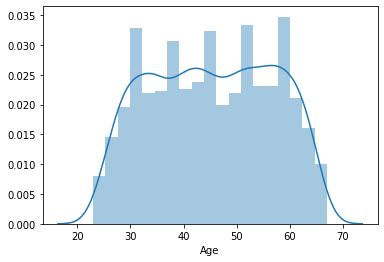

In [ ]:
sns.distplot(dataframe_1.Age) # Age seems to have symmetric distribution.

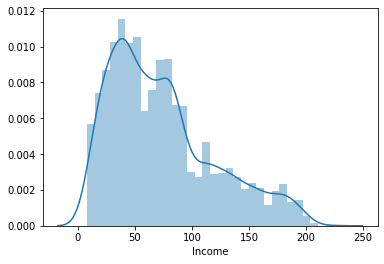

In [ ]:
sns.distplot(dataframe_1.Income)  # Income seems to have right skewed distribution.

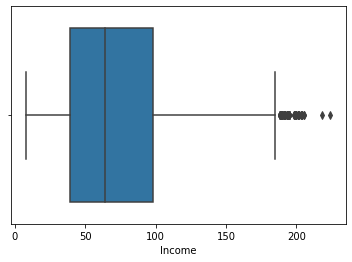

In [ ]:
sns.boxplot(dataframe_1.Income) # Income have some outliers.

In [ ]:
print(dataframe_1['Income'].skew()) # Income have 0.8413 skewness.

0.8413386072610816


In [ ]:
dataframe_1['Personal Loan'].corr(dataframe_1.Income) # Income have 0.50246 correlation with personal loan before transformation.

0.5024622924949348

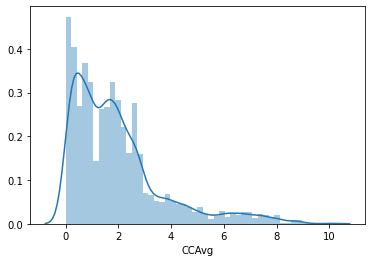

In [ ]:
sns.distplot(dataframe_1.CCAvg) # CreditCard average seems to have right skewed distribution.

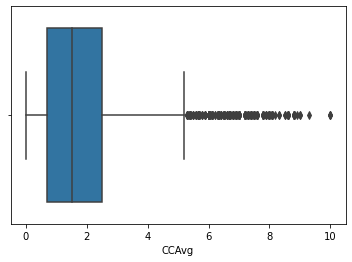

In [ ]:
sns.boxplot(dataframe_1.CCAvg)  # CreditCard average have some more outliers.

In [ ]:
print(dataframe_1['CCAvg'].skew())  # CreditCard average have 1.59845 skewness.

1.598456618052042


In [ ]:
dataframe_1['Personal Loan'].corr(dataframe_1.CCAvg)  # CreditCard average have 0.36689 correlation with personal loan before transformation.

0.3668905333979776

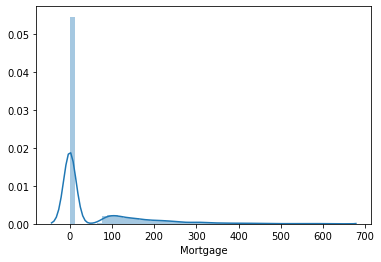

In [ ]:
sns.distplot(dataframe_1.Mortgage)  # Mortgage seems highly skewed.

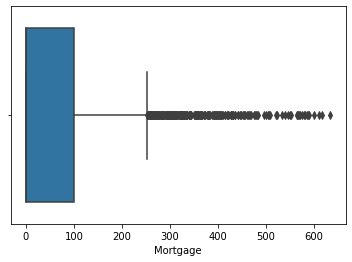

In [ ]:
sns.boxplot(dataframe_1.Mortgage) # Mortgage have high no of outliers.

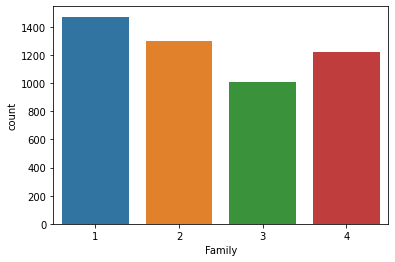

In [ ]:
sns.countplot(dataframe_1.Family)

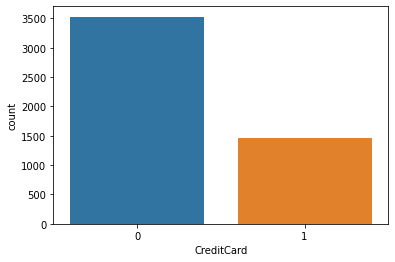

In [ ]:
sns.countplot(dataframe_1.CreditCard)

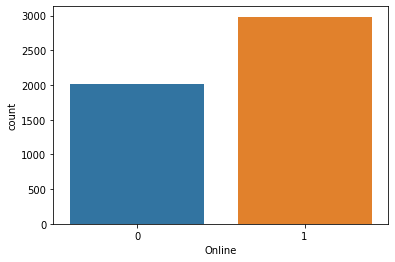

In [ ]:
sns.countplot(dataframe_1.Online)

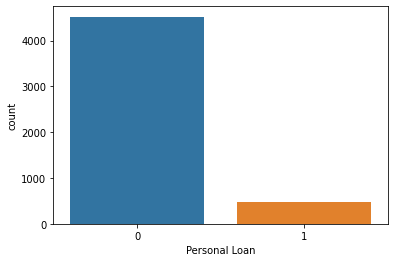

In [ ]:
sns.countplot(dataframe_1['Personal Loan'])

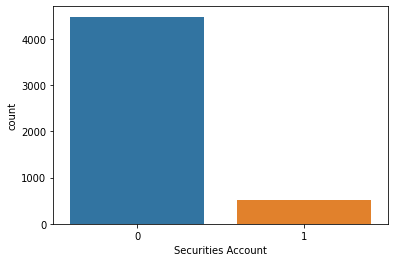

In [ ]:
sns.countplot(dataframe_1['Securities Account'])

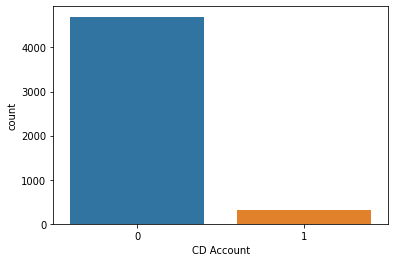

In [ ]:
sns.countplot(dataframe_1['CD Account'])

* **Multivariate Analysis**









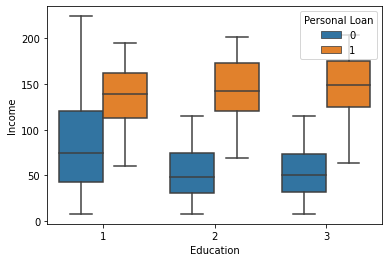

In [ ]:
# It seems the customers who have more income is granted loan across each education level.
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=dataframe_1)

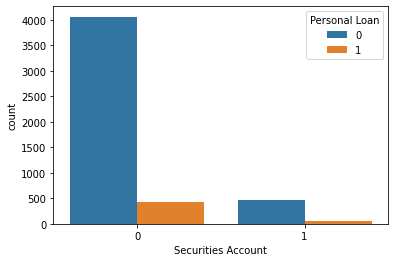

In [ ]:
# It seems majority of customers having Securities Account don't have personal Loan.
sns.countplot(x='Securities Account',hue='Personal Loan',data=dataframe_1)

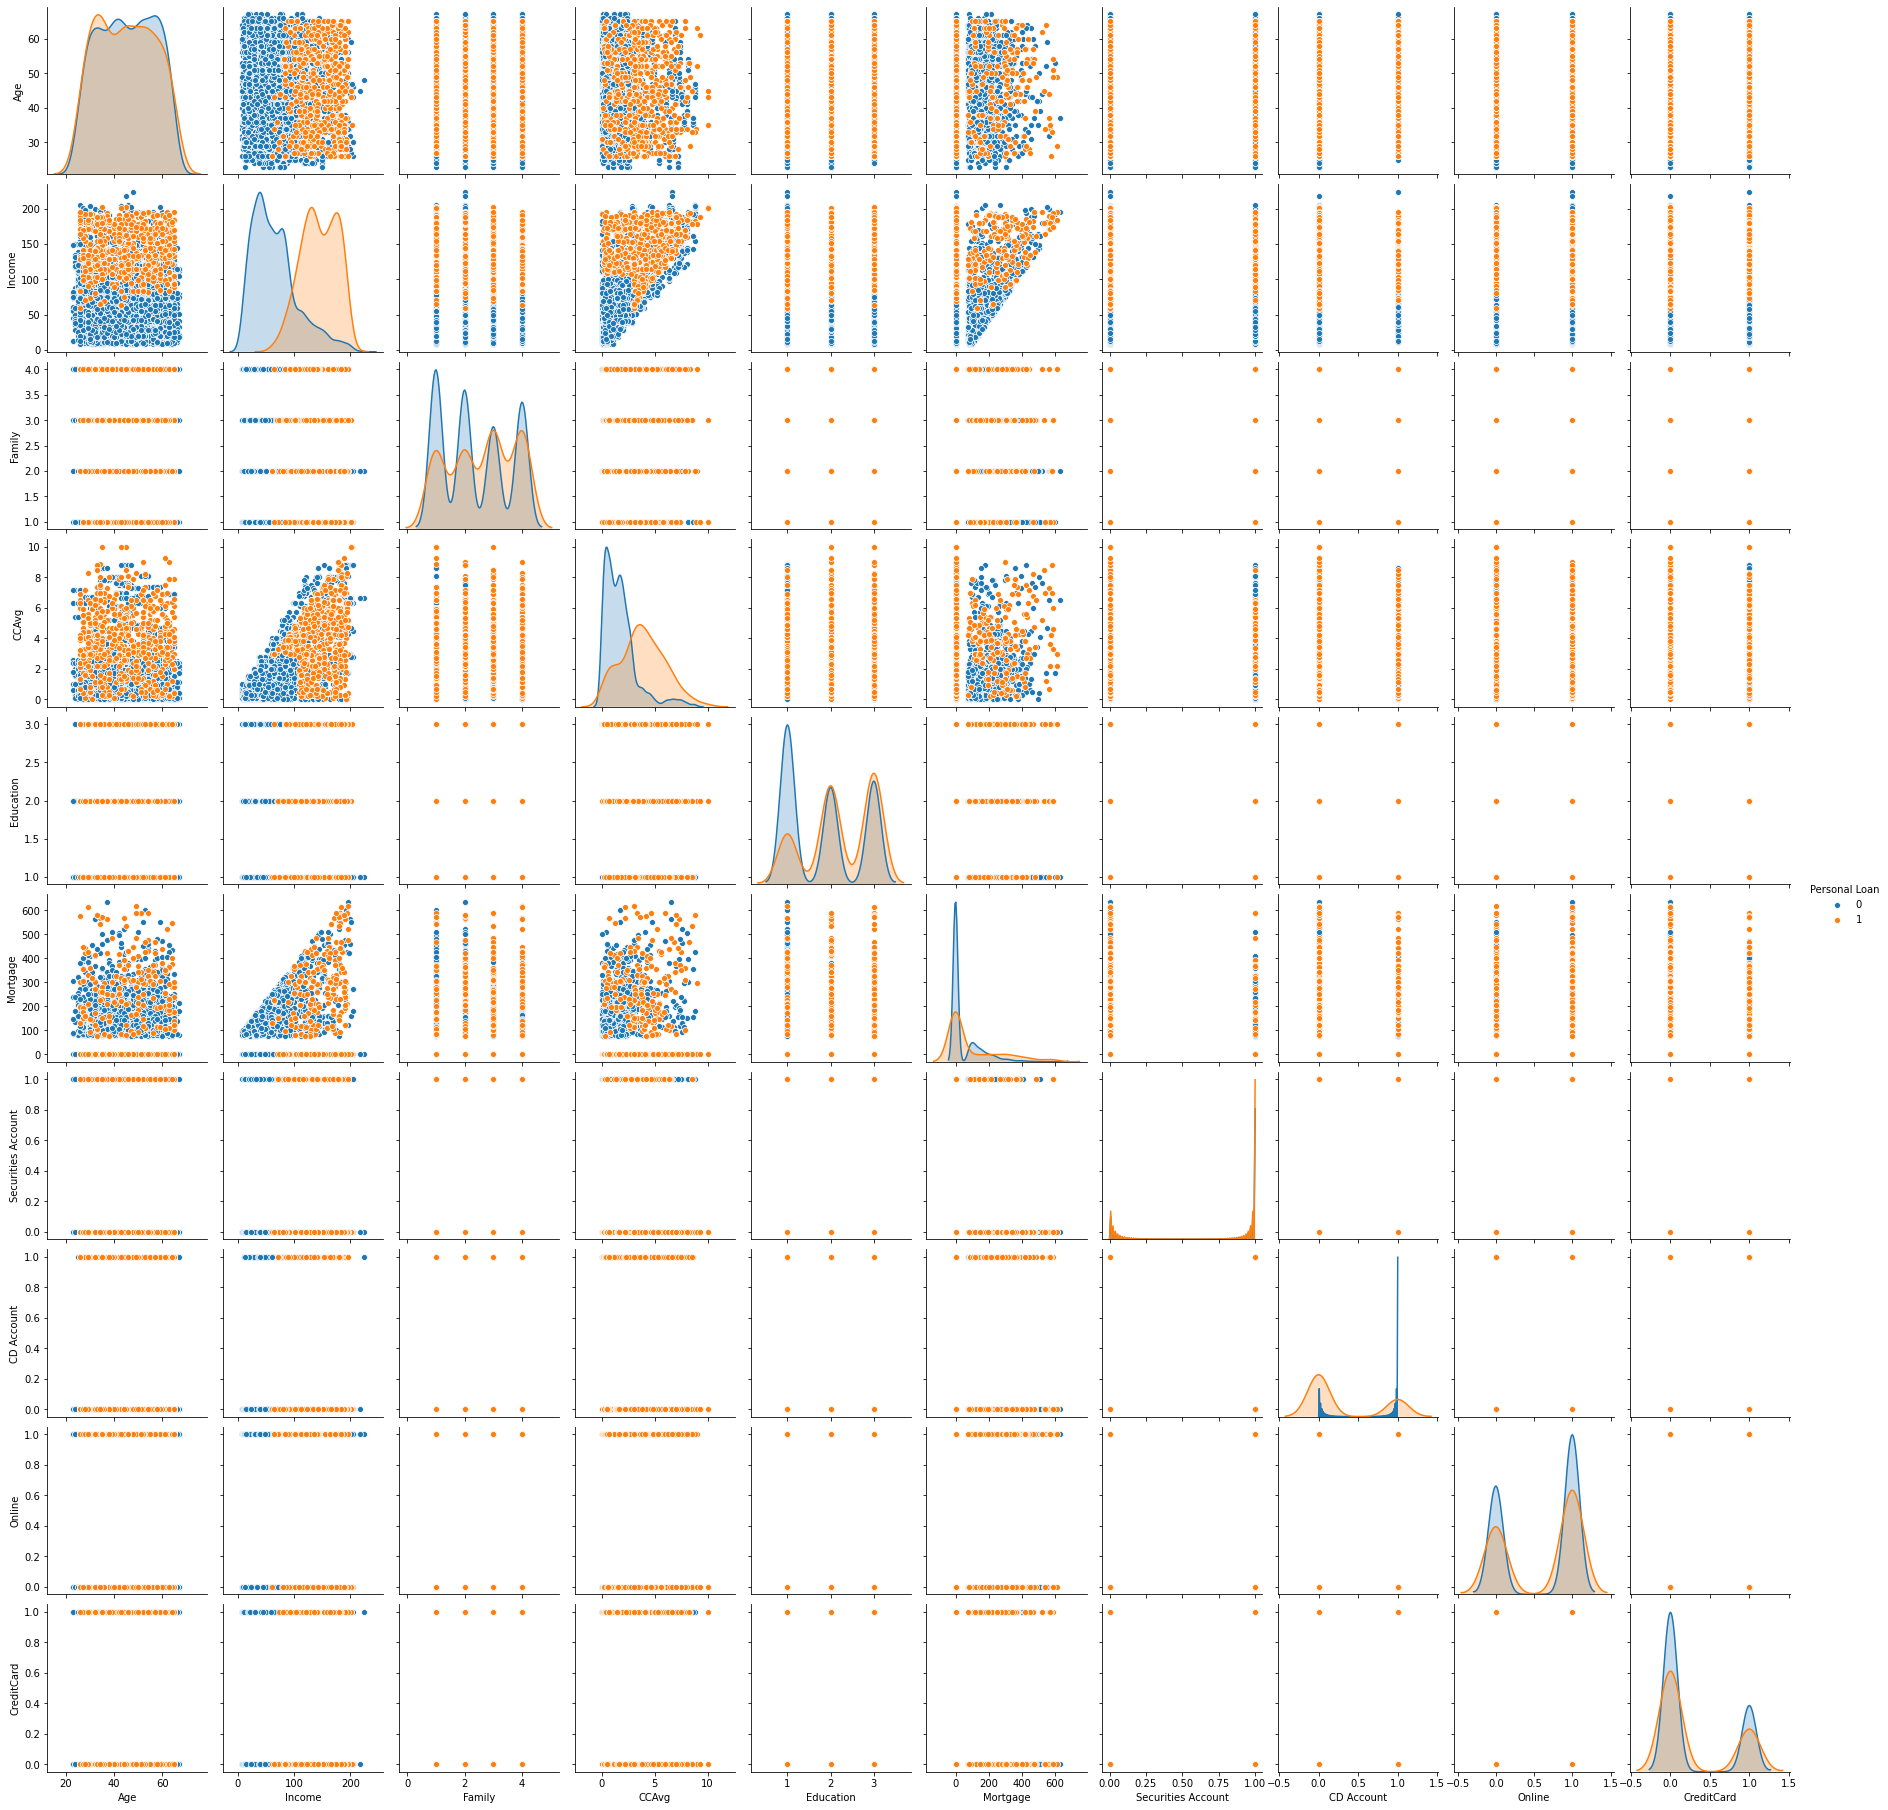

In [ ]:
sns.pairplot(dataframe_1,hue='Personal Loan')

### Corrrelation matrix (heatmap)

### Heatmap of original dataframe:

A correlation matrix is a matrix that represents the pair correlation of all the variables.

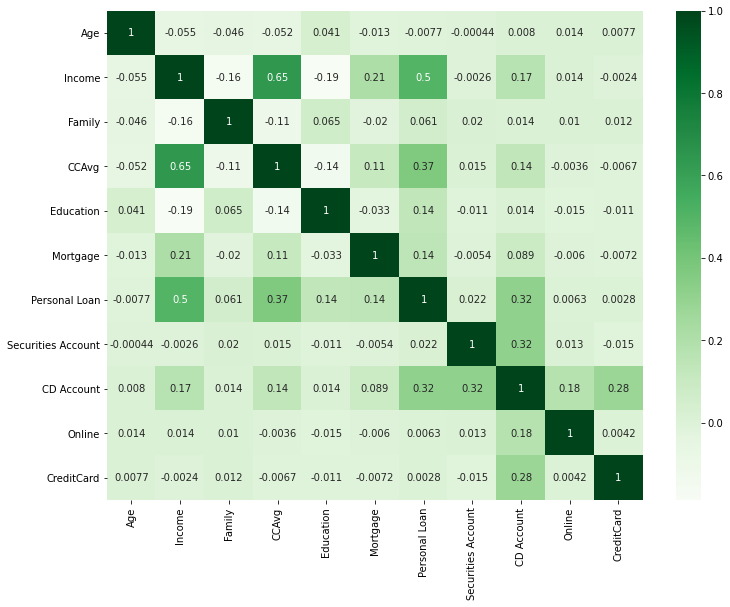

In [ ]:
corrmatrix=dataframe_1.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmatrix,cmap='Greens',annot=True)

There is no significiant correlation between other columns except Income and CCAvg. So we have to do necessary transformations on these columns.

In [ ]:
dataframe_1.describe()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
dataframe_1.Income.describe()

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

In [ ]:
dataframe_1.CCAvg.describe()

count    5000.000000
mean        1.937913
std         1.747666
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

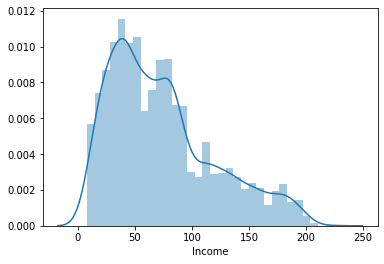

In [ ]:
sns.distplot(dataframe_1.Income)

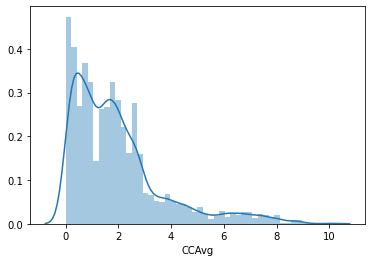

In [ ]:
sns.distplot(dataframe_1.CCAvg)

# **4. Apply necessary transformations for the feature variables**


**Also we are not using any outlier removing methods because after transformation we get good result without outlier removing method. After transformation we are not getting any outliers.**

As there is skewness in Income and CCAvg column, we will apply necessary transformations to that variables only.

> Here we use Power Transformation as it makes the skewness much less and make the curve more normal with having no much difference in correlation also.



In [ ]:
dataframe.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


-0.038354650964631455
0.4396228246780443


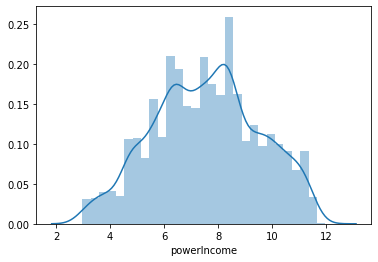

In [ ]:
powertransformer=PowerTransformer(method='yeo-johnson',standardize=False).fit(dataframe_1.Income.values.reshape(-1,1))
dataframe_1["powerIncome"]=powertransformer.transform(dataframe_1.Income.values.reshape(-1,1))
sns.distplot(dataframe_1.powerIncome)
print(scipy.stats.skew(dataframe_1.powerIncome))
print(dataframe_1["Personal Loan"].corr(dataframe_1.powerIncome))

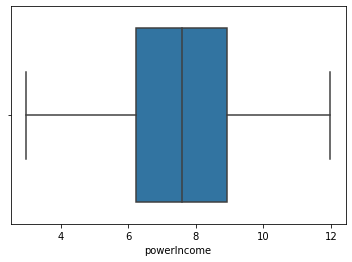

In [ ]:
sns.boxplot(dataframe_1.powerIncome)   # outliers got removed.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0.03199862249753541
0.3200318706830174


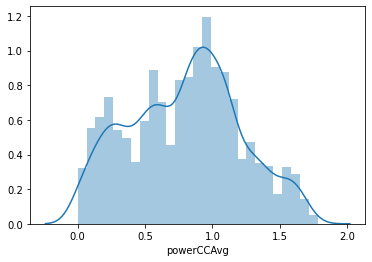

In [ ]:
powertransformer=PowerTransformer(method='yeo-johnson',standardize=False)
powertransformer.fit(dataframe_1.CCAvg.values.reshape(-1,1))
dataframe_1["powerCCAvg"]=powertransformer.transform(dataframe_1.CCAvg.values.reshape(-1,1))
sns.distplot(dataframe_1.powerCCAvg)
print(scipy.stats.skew(dataframe_1.powerCCAvg))
print(dataframe_1["Personal Loan"].corr(dataframe_1.powerCCAvg))

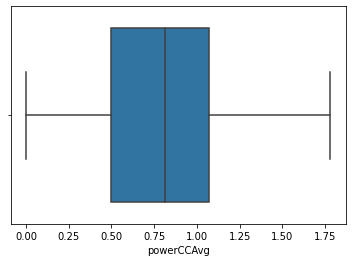

In [ ]:
sns.boxplot(dataframe_1.powerCCAvg) # outliers got removed.

In [ ]:
dataframe_1.shape

(5000, 13)

In [ ]:
dataframe_1.describe()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,powerIncome,powerCCAvg
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,73.774200,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,7.561003,0.795804
std,11.463166,46.033729,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,1.961533,0.413296
min,23.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.972350,-0.000000
25%,35.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,6.222469,0.495347
50%,45.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,7.585900,0.814468
75%,55.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,8.916412,1.067696
max,67.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,11.976488,1.779724


### Heatmap of original dataframe:

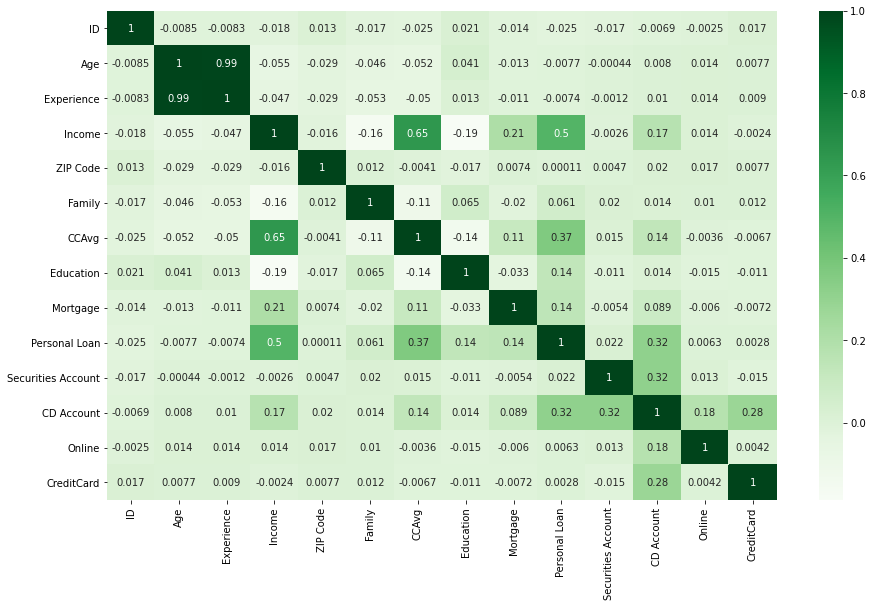

In [ ]:
plt.subplots(figsize=(15,9))
sns.heatmap(dataframe.corr(), cmap="Greens", annot=True)

### Heatmap of dataframe after transformation:

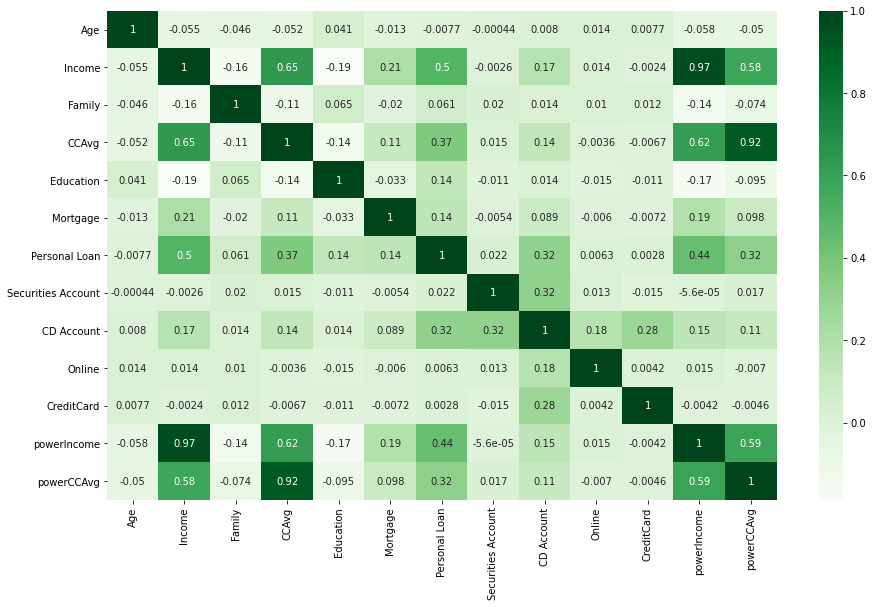

In [ ]:
plt.subplots(figsize=(15,9))
sns.heatmap(dataframe_1.corr(), cmap="Greens", annot=True)

We don't need previous 'Income' and 'CCAvg' variables after being transformed them. So we are dropping them.

In [ ]:
dataframe_1.drop(['Income','CCAvg'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Now our dataframe will be new dataframe which has 'powerIncome' and 'powerCCAvg' instead of 'Income' and 'CCAvg'.

In [ ]:
dataframe_1.describe()

,Age,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,powerIncome,powerCCAvg
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,2.396400,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,7.561003,0.795804
std,11.463166,1.147663,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,1.961533,0.413296
min,23.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.972350,-0.000000
25%,35.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,6.222469,0.495347
50%,45.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,7.585900,0.814468
75%,55.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,8.916412,1.067696
max,67.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,11.976488,1.779724


**Here we are not doing binning in mortgage because sqrt transformation gives good result than binning. By doing sqrt transformation in Mortgage, outliers are getting removed and giving good result. That's why we are using sqrt transfromation here.**

In [ ]:
dataframe_1['sqrtMortgage']=np.sqrt(dataframe_1.Mortgage)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataframe_1.describe()

,Age,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,powerIncome,powerCCAvg,sqrtMortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,2.396400,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,7.561003,0.795804,4.036253
std,11.463166,1.147663,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,1.961533,0.413296,6.341569
min,23.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.972350,-0.000000,0.000000
25%,35.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,6.222469,0.495347,0.000000
50%,45.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,7.585900,0.814468,0.000000
75%,55.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,8.916412,1.067696,10.049876
max,67.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,11.976488,1.779724,25.199206


After creating sqrtMortgage, Mortgage column is not needed. So we are dropping it.

In [ ]:
dataframe_1.drop(['Mortgage'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
dataframe_1.describe()

,Age,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,powerIncome,powerCCAvg,sqrtMortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,2.396400,1.881000,0.096000,0.104400,0.06040,0.596800,0.294000,7.561003,0.795804,4.036253
std,11.463166,1.147663,0.839869,0.294621,0.305809,0.23825,0.490589,0.455637,1.961533,0.413296,6.341569
min,23.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.972350,-0.000000,0.000000
25%,35.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,6.222469,0.495347,0.000000
50%,45.000000,2.000000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,7.585900,0.814468,0.000000
75%,55.000000,3.000000,3.000000,0.000000,0.000000,0.00000,1.000000,1.000000,8.916412,1.067696,10.049876
max,67.000000,4.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000,11.976488,1.779724,25.199206


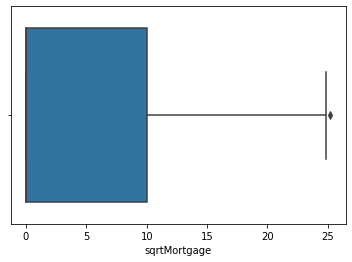

In [ ]:
sns.boxplot(dataframe_1.sqrtMortgage)

Making Feature and Target variables.

Here our target variable is 'Personal Loan' and other all variables are feature variables.

In [ ]:
dataframe_x=dataframe_1.loc[:,dataframe_1.columns!="Personal Loan"]
dataframe_y=dataframe_1[["Personal Loan"]]

# **5. Normalise your data and split the data into training and test set in the ratio of 70:30 respectively**


we are training and splitting the model using stratified sampling because 0:1 ratio in 'Personal Loan' column is very high. So there might be chances of model getting split in which test model have no '1's. So to ensure that there will be equal splitting of '1's in train and test model, we use stratified sampling.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(dataframe_x,dataframe_y,test_size=0.3,stratify=dataframe_y,random_state=8)

<a name="lr"></a>
# **6. Use the Logistic Regression model to predict the likelihood of a customer buying personal loans**


Here we are creating the object of LogisticRegression and fitting it in train model

In [ ]:
LR=LogisticRegression(max_iter=500).fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Now we store the predicted values of test and train model.

In [ ]:
l_test_pred=LR.predict(x_test)
l_train_pred=LR.predict(x_train)

# **7. Print all the metrics related for evaluating the model performance.**

Here we are creating a function to plot a pretty confusion matrix using heatmap.

In [ ]:
def confmatrix(actual,predicted):
  CM=confusion_matrix(actual,predicted)
  sns.heatmap(CM,cmap='plasma',xticklabels=[0,1],yticklabels=[0,1],fmt='.2f',annot=True)
  plt.xlabel('predicted')
  plt.ylabel('actual')
  plt.show()

printing all metrics scores of train and test model.

In [ ]:
print("Logistic test Accuracy:",accuracy_score(y_test,l_test_pred))              #accuracy_score of logistic test
print("Logistic train Accuracy:",accuracy_score(y_train,l_train_pred))           #accuracy_score of logistic train
print("Logistic test precision tree:",precision_score(y_test,l_test_pred))       #precision_score of logistic test
print("Logistic train precision tree:",precision_score(y_train,l_train_pred))    #precision_score of logistic train
print("Logistic test recall score:",recall_score(y_test,l_test_pred))            #recall_score of logistic test
print("Logistic train recall score:",recall_score(y_train,l_train_pred))         #recall_score of logistic train
print("Logistic test f1 score:",f1_score(y_test,l_test_pred))                    #f1_score of logistic test
print("Logistic train f1 score:",f1_score(y_train,l_train_pred))                 #f1_score of logistic train
print("Logistic test roc auc score:",roc_auc_score(y_test,l_test_pred))          #roc_auc_score of logistic test
print("Logistic train roc auc score:",roc_auc_score(y_train,l_train_pred))       ##roc_auc_score of logistic train

Logistic test Accuracy: 0.9586666666666667
Logistic train Accuracy: 0.9554285714285714
Logistic test precision tree: 0.8596491228070176
Logistic train precision tree: 0.8515625
Logistic test recall score: 0.6805555555555556
Logistic train recall score: 0.6488095238095238
Logistic test f1 score: 0.7596899224806201
Logistic train f1 score: 0.7364864864864866
Logistic test roc auc score: 0.8343780727630286
Logistic train roc auc score: 0.8183997050147492


Logistic test confusion matrix:


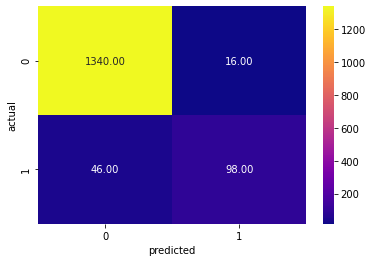

None
Logistic train confusion matrix:


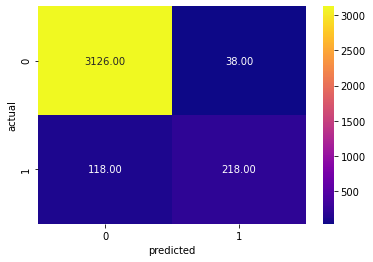

None


In [ ]:
print("Logistic test confusion matrix:")
print(confmatrix(y_test,l_test_pred))
print("Logistic train confusion matrix:")
print(confmatrix(y_train,l_train_pred))

In [ ]:
print("Logistic test classification report:")
print(classification_report(y_test,l_test_pred,digits=4))
print("Logistic train classification report:")
print(classification_report(y_train,l_train_pred,digits=4))

Logistic test classification report:
              precision    recall  f1-score   support

           0     0.9668    0.9882    0.9774      1356
           1     0.8596    0.6806    0.7597       144

    accuracy                         0.9587      1500
   macro avg     0.9132    0.8344    0.8685      1500
weighted avg     0.9565    0.9587    0.9565      1500

Logistic train classification report:
              precision    recall  f1-score   support

           0     0.9636    0.9880    0.9757      3164
           1     0.8516    0.6488    0.7365       336

    accuracy                         0.9554      3500
   macro avg     0.9076    0.8184    0.8561      3500
weighted avg     0.9529    0.9554    0.9527      3500



# **8. Build various other classification algorithms and compare their performance**


<a name="knn"></a>
**1. KNeighbour Classifier**

Here we are creating object of KNeighboursClassifiers and fitting it into train model.

In [ ]:
KN = KNeighborsClassifier(n_neighbors = 5).fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


Now we are storing the predicted values of test and train model.

In [ ]:
kn_test_pred = KN.predict(x_test)
kn_train_pred = KN.predict(x_train)

In [ ]:
print("KNeighbour test Accuracy:",accuracy_score(y_test,kn_test_pred))              #accuracy_score of KN test
print("KNeighbour train Accuracy:",accuracy_score(y_train,kn_train_pred))           #accuracy_score of KN train
print("KNeighbour test precision tree:",precision_score(y_test,kn_test_pred))       #precision_score of KN test
print("KNeighbour train precision tree:",precision_score(y_train,kn_train_pred))    #precision_score of KN train
print("KNeighbour test recall score:",recall_score(y_test,kn_test_pred))            #recall_score of KN test
print("KNeighbour train recall score:",recall_score(y_train,kn_train_pred))         #recall_score of KN train
print("KNeighbour test f1 score:",f1_score(y_test,kn_test_pred))                    #f1_score of KN test
print("KNeighbour train f1 score:",f1_score(y_train,kn_train_pred))                 #f1_score of KN train
print("KNeighbour test roc auc score:",roc_auc_score(y_test,kn_test_pred))          #roc_auc_score of KN test
print("KNeighbour train roc auc score:",roc_auc_score(y_train,kn_train_pred))       ##roc_auc_score of KN train

KNeighbour test Accuracy: 0.948
KNeighbour train Accuracy: 0.962
KNeighbour test precision tree: 0.9024390243902439
KNeighbour train precision tree: 0.9634703196347032
KNeighbour test recall score: 0.5138888888888888
KNeighbour train recall score: 0.6279761904761905
KNeighbour test f1 score: 0.6548672566371682
KNeighbour train f1 score: 0.7603603603603604
KNeighbour test roc auc score: 0.7539945919370697
KNeighbour train roc auc score: 0.8127238727349346


KN test confusion matrix:


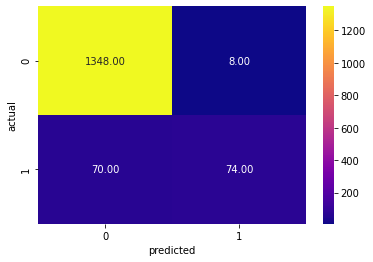

None
KN train confusion matrix:


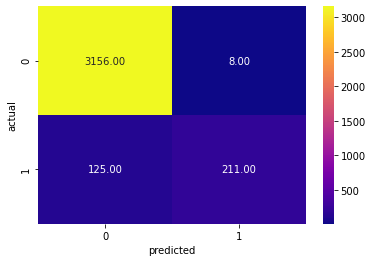

None


In [ ]:
print("KN test confusion matrix:")
print(confmatrix(y_test,kn_test_pred))
print("KN train confusion matrix:")
print(confmatrix(y_train,kn_train_pred))

In [ ]:
print("KNeighbours test classification report:")
print(classification_report(y_test,kn_test_pred,digits=4))
print("KNeighbours train classification report")
print(classification_report(y_train,kn_train_pred,digits=4))

KNeighbours test classification report:
              precision    recall  f1-score   support

           0     0.9506    0.9941    0.9719      1356
           1     0.9024    0.5139    0.6549       144

    accuracy                         0.9480      1500
   macro avg     0.9265    0.7540    0.8134      1500
weighted avg     0.9460    0.9480    0.9414      1500

KNeighbours train classification report
              precision    recall  f1-score   support

           0     0.9619    0.9975    0.9794      3164
           1     0.9635    0.6280    0.7604       336

    accuracy                         0.9620      3500
   macro avg     0.9627    0.8127    0.8699      3500
weighted avg     0.9621    0.9620    0.9583      3500



<a name="dt"></a>
**2. DecisionTree Classifier**

Here we are creating object of DecisionTreeClassifier and fitting it into train model.

In [ ]:
DT = DecisionTreeClassifier(criterion = 'gini', random_state = 42, max_depth=6).fit(x_train, y_train)

Now we store the predicted values of train and test model.

In [ ]:
dt_test_pred = DT.predict(x_test)
dt_train_pred = DT.predict(x_train)

In [ ]:
print("DT test Accuracy:",accuracy_score(y_test,dt_test_pred))              #accuracy_score of DT test
print("DT train Accuracy:",accuracy_score(y_train,dt_train_pred))           #accuracy_score of DT train
print("DT test precision tree:",precision_score(y_test,dt_test_pred))       #precision_score of DT test
print("DT train precision tree:",precision_score(y_train,dt_train_pred))    #precision_score of DT train
print("DT test recall score:",recall_score(y_test,dt_test_pred))            #recall_score of DT test
print("DT train recall score:",recall_score(y_train,dt_train_pred))         #recall_score of DT train
print("DT test f1 score:",f1_score(y_test,dt_test_pred))                    #f1_score of DT test
print("DT train f1 score:",f1_score(y_train,dt_train_pred))                 #f1_score of DT train
print("DT test roc auc score:",roc_auc_score(y_test,dt_test_pred))          #roc_auc_score of DT test
print("DT train roc auc score:",roc_auc_score(y_train,dt_train_pred))       ##roc_auc_score of DT train

DT test Accuracy: 0.9853333333333333
DT train Accuracy: 0.9925714285714285
DT test precision tree: 0.9420289855072463
DT train precision tree: 0.9813664596273292
DT test recall score: 0.9027777777777778
DT train recall score: 0.9404761904761905
DT test f1 score: 0.9219858156028369
DT train f1 score: 0.9604863221884498
DT test roc auc score: 0.9484390363815142
DT train roc auc score: 0.9692899283607248


DT test confusion matrix:


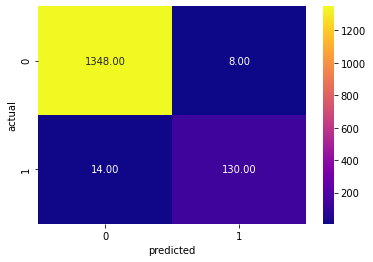

None
DT train confusion matrix:


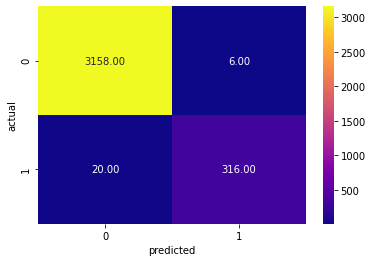

None


In [ ]:
print("DT test confusion matrix:")
print(confmatrix(y_test,dt_test_pred))
print("DT train confusion matrix:")
print(confmatrix(y_train,dt_train_pred))

In [ ]:
print("DT test classification report:")
print(classification_report(y_test,dt_test_pred,digits=4))
print("DT train classification report")
print(classification_report(y_train,dt_train_pred,digits=4))

DT test classification report:
              precision    recall  f1-score   support

           0     0.9897    0.9941    0.9919      1356
           1     0.9420    0.9028    0.9220       144

    accuracy                         0.9853      1500
   macro avg     0.9659    0.9484    0.9569      1500
weighted avg     0.9851    0.9853    0.9852      1500

DT train classification report
              precision    recall  f1-score   support

           0     0.9937    0.9981    0.9959      3164
           1     0.9814    0.9405    0.9605       336

    accuracy                         0.9926      3500
   macro avg     0.9875    0.9693    0.9782      3500
weighted avg     0.9925    0.9926    0.9925      3500



<a name="rf"></a>
**3. RandomForest Classifier**

Here we are creating object of RandomForestClassifier and fitting it into train model.

In [ ]:
RF = RandomForestClassifier(n_estimators=8,criterion = 'entropy', random_state = 42, max_depth=9).fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Now we are storing predicted values to train and test model.

In [ ]:
rf_test_pred = RF.predict(x_test)
rf_train_pred = RF.predict(x_train)

In [ ]:
print("RF test Accuracy:",accuracy_score(y_test,rf_test_pred))              #accuracy_score of RF test
print("RF train Accuracy:",accuracy_score(y_train,rf_train_pred))           #accuracy_score of RF train
print("RF test precision tree:",precision_score(y_test,rf_test_pred))       #precision_score of RF test
print("RF train precision tree:",precision_score(y_train,rf_train_pred))    #precision_score of RF train
print("RF test recall score:",recall_score(y_test,rf_test_pred))            #recall_score of RF test
print("RF train recall score:",recall_score(y_train,rf_train_pred))         #recall_score of RF train
print("RF test f1 score:",f1_score(y_test,rf_test_pred))                    #f1_score of RF test
print("RF train f1 score:",f1_score(y_train,rf_train_pred))                 #f1_score of RF train
print("RF test roc auc score:",roc_auc_score(y_test,rf_test_pred))          #roc_auc_score of RF test
print("RF train roc auc score:",roc_auc_score(y_train,rf_train_pred))       ##roc_auc_score of RF train

RF test Accuracy: 0.9893333333333333
RF train Accuracy: 0.9962857142857143
RF test precision tree: 0.9705882352941176
RF train precision tree: 0.9908814589665653
RF test recall score: 0.9166666666666666
RF train recall score: 0.9702380952380952
RF test f1 score: 0.9428571428571428
RF train f1 score: 0.9804511278195489
RF test roc auc score: 0.956858407079646
RF train roc auc score: 0.9846449641803624


RF test confusion matrix:


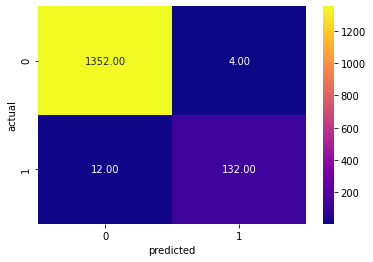

None
RF train confusion matrix:


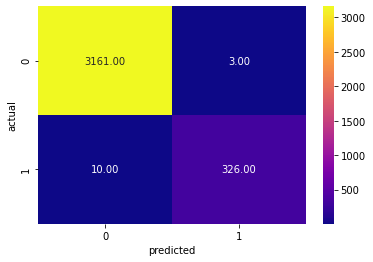

None


In [ ]:
print("RF test confusion matrix:")
print(confmatrix(y_test,rf_test_pred))
print("RF train confusion matrix:")
print(confmatrix(y_train,rf_train_pred))

In [ ]:
print("RF test classification report:")
print(classification_report(y_test,rf_test_pred,digits=4))
print("RF train classification report")
print(classification_report(y_train,rf_train_pred,digits=4))

RF test classification report:
              precision    recall  f1-score   support

           0     0.9912    0.9971    0.9941      1356
           1     0.9706    0.9167    0.9429       144

    accuracy                         0.9893      1500
   macro avg     0.9809    0.9569    0.9685      1500
weighted avg     0.9892    0.9893    0.9892      1500

RF train classification report
              precision    recall  f1-score   support

           0     0.9968    0.9991    0.9979      3164
           1     0.9909    0.9702    0.9805       336

    accuracy                         0.9963      3500
   macro avg     0.9939    0.9846    0.9892      3500
weighted avg     0.9963    0.9963    0.9963      3500



<a name="nb"></a>
**4. Naive Bayes Classifier**

Here we are creating object of naive_bayes and fitting it into test and test model.

In [ ]:
from sklearn.naive_bayes import GaussianNB 
NB = GaussianNB().fit(x_train, y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Now we are storing predicted values of test and train model.

In [ ]:
nb_test_pred = NB.predict(x_test)
nb_train_pred = NB.predict(x_train)

In [ ]:
print("NB test Accuracy:",accuracy_score(y_test,nb_test_pred))              #accuracy_score of NB test
print("NB train Accuracy:",accuracy_score(y_train,nb_train_pred))           #accuracy_score of NB train
print("NB test precision tree:",precision_score(y_test,nb_test_pred))       #precision_score of NB test
print("NB train precision tree:",precision_score(y_train,nb_train_pred))    #precision_score of NB train
print("NB test recall score:",recall_score(y_test,nb_test_pred))            #recall_score of NB test
print("NB train recall score:",recall_score(y_train,nb_train_pred))         #recall_score of NB train
print("NB test f1 score:",f1_score(y_test,nb_test_pred))                    #f1_score of NB test
print("NB train f1 score:",f1_score(y_train,nb_train_pred))                 #f1_score of NB train
print("NB test roc auc score:",roc_auc_score(y_test,nb_test_pred))          #roc_auc_score of NB test
print("NB train roc auc score:",roc_auc_score(y_train,nb_train_pred))       ##roc_auc_score of NB train

NB test Accuracy: 0.9073333333333333
NB train Accuracy: 0.9177142857142857
NB test precision tree: 0.5190839694656488
NB train precision tree: 0.5827586206896552
NB test recall score: 0.4722222222222222
NB train recall score: 0.5029761904761905
NB test f1 score: 0.4945454545454545
NB train f1 score: 0.5399361022364219
NB test roc auc score: 0.7128810226155359
NB train roc auc score: 0.7323667298777918


NB test confusion matrix:


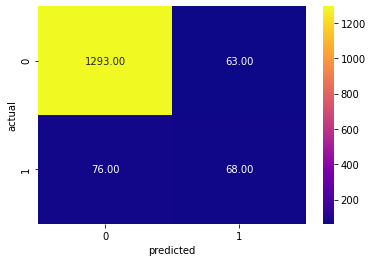

None
NB train confusion matrix:


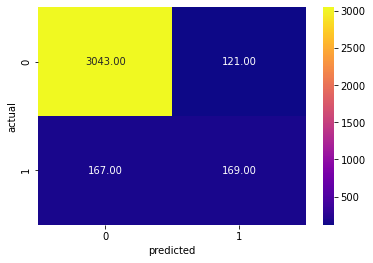

None


In [ ]:
print("NB test confusion matrix:")
print(confmatrix(y_test,nb_test_pred))
print("NB train confusion matrix:")
print(confmatrix(y_train,nb_train_pred))

In [ ]:
print("NB test classification report:")
print(classification_report(y_test,nb_test_pred,digits=4))
print("NB train classification report:")
print(classification_report(y_train,nb_train_pred,digits=4))

NB test classification report:
              precision    recall  f1-score   support

           0     0.9445    0.9535    0.9490      1356
           1     0.5191    0.4722    0.4945       144

    accuracy                         0.9073      1500
   macro avg     0.7318    0.7129    0.7218      1500
weighted avg     0.9036    0.9073    0.9054      1500

NB train classification report:
              precision    recall  f1-score   support

           0     0.9480    0.9618    0.9548      3164
           1     0.5828    0.5030    0.5399       336

    accuracy                         0.9177      3500
   macro avg     0.7654    0.7324    0.7474      3500
weighted avg     0.9129    0.9177    0.9150      3500



# **9. Give a business understanding of your model**

**1. Importing libraries, Statistical summarization, Cleaning the Variables:**

Firstly, I imported all the necessary libraries like numpy, pandas etc. and did some Statistical Summarization in which i found that there is a negative value in 'Experience' column which is not possible.So we have to clean that data. Also Experience does not have an impact with the dataset. And Experience is correlated with Age. If the column is there or not, it does not make any difference. so we are dropping Experience Column. Also we dont need ID, ZIP Code also which does not make any difference. So dropped them also.

**2. EDA, Univariate Analysis, Multivariate Analysis:**

Then i did Exploratory Data Analysis(EDA)-Studied the data distribution in each attribute and target variable, shared my findings. 

Then i did univariate analysis, in which i got to know that Age seems to have symmetric distribution, Income have right skewed distribution and have some outliers, CCAvg also have right skewed distribution and have more outliers, Mortgage have high skewed distribution and have high no of outliers. So we have to do necessary transformations on Income ,CCavg, Mortgage.

Then i did Multivariate analysis in which i found that it seems the customers who have more income is granted loan across each education level and majority of customers having Securities Account don't have personal Loan.

Then i plotted heatmap of the dataframe in which there is no significiant correlation between other columns except Income and CCAvg. So we have to do necessary transformations on these columns.

> Correlation between Income and CCAvg = 0.65

> Correlation between Income and Personal Loan = 0.5

> Correlation between CCAvg and Personal Loan = 0.37

**3. Power transformation on Income, CCAvg:**

As there is skewness in Income and CCAvg column, we applied necessary transformations to that variables only.
Here I used Power Transformation on Income and CCAvg as it made the skewness much less, made the curve more normal with having no much difference in correlation, removed all the outliers.

> We didn't using any outlier removing methods because after transformation we get good result without outlier removing method. After transformation we are not getting any outliers.

Then i plotted heatmap of original dataframe and power transformed dataframe in which i saw only few changes.

> Correlation between Income and CCAvg differed from 0.65 to 0.59

> Correlation between Income and Personal Loan differed from 0.5 to 0.44

> Correlation between CCAvg and Personal Loan differed from 0.37 to 0.32

**4. Sqrt transformation on Mortgage:**

So i did Sqrt transformation on Mortgage in which i got removed all outliers.

> **Here we didn't do binning in mortgage because sqrt transformation gives good result than binning. By doing sqrt transformation in Mortgage, outliers are getting removed and yields good result. That's why we are using sqrt transfromation here.**

**5. Making target and feature variables,train and test data split:**

So i made Personal Loan as our target variable and rest of all other variables as feature variable. Then i split the data into train and test model in 70:30 ratio.

> **we trained and split the model using stratified sampling because 0:1 ratio in 'Personal Loan' column is very high. So there might be chances of model getting split in which test model have no '1's. So to ensure that there will be equal splitting of '1's in train and test model, we used stratified sampling.**

**6. Logistic Regression Model:**

I used logistic Regression model to predict the likelihood of a customer buying
personal loans. Here is the results:

> Logistic test Accuracy: 0.9586666666666667

> Logistic train Accuracy: 0.9554285714285714

> Logistic test precision tree: 0.8596491228070176

> Logistic train precision tree: 0.8515625

> Logistic test recall score: 0.6805555555555556

> Logistic train recall score: 0.6488095238095238

> Logistic test f1 score: 0.7596899224806201

> Logistic train f1 score: 0.7364864864864866

> Logistic test roc auc score: 0.8343780727630286

> Logistic train roc auc score: 0.8183997050147492

**Logistic Confusion test Matrix:**

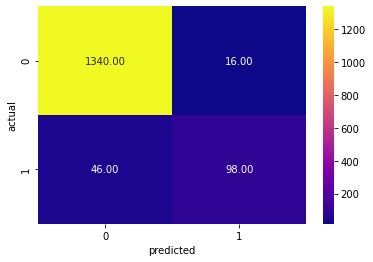

**Logistic Confusion train matrix:**

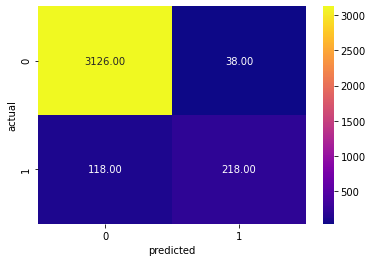

**7. Build various other classification algorithms and compare their performance:**

**TEST COMPARISON TABLE:**

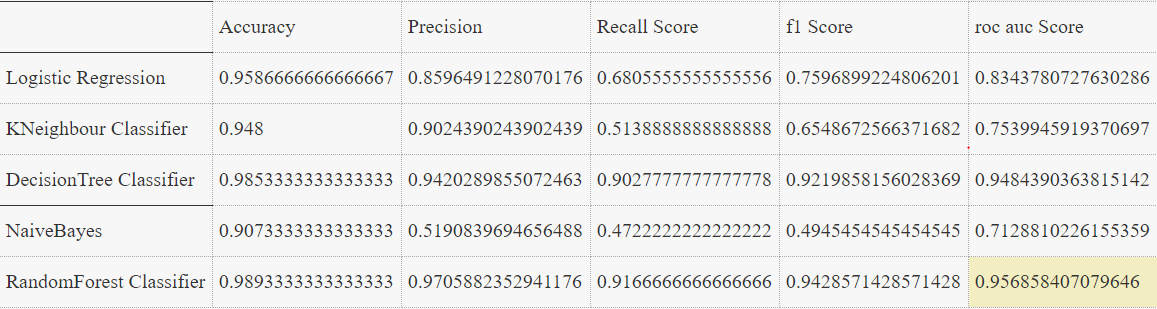

**KNeighbour test Confusion Matrix:**

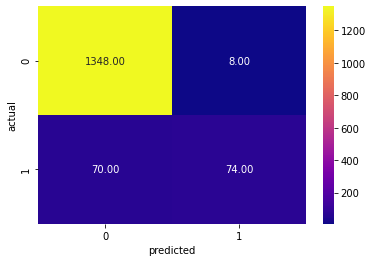

**DecisionTree Test Confusion Matrix:**

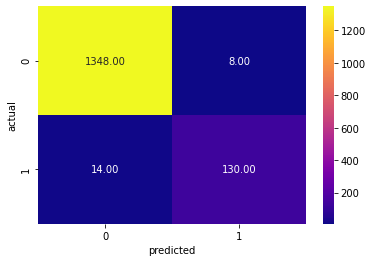

**NaiveBayes test Confusion Matrix:**

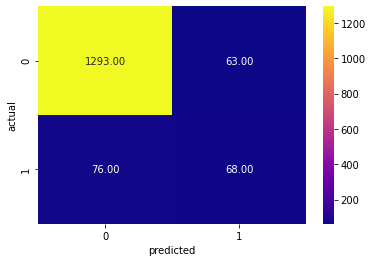

**RandomForest test confusion matrix:**

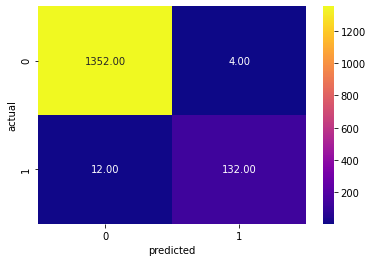

**TRAIN COMPARISON TABLE:**

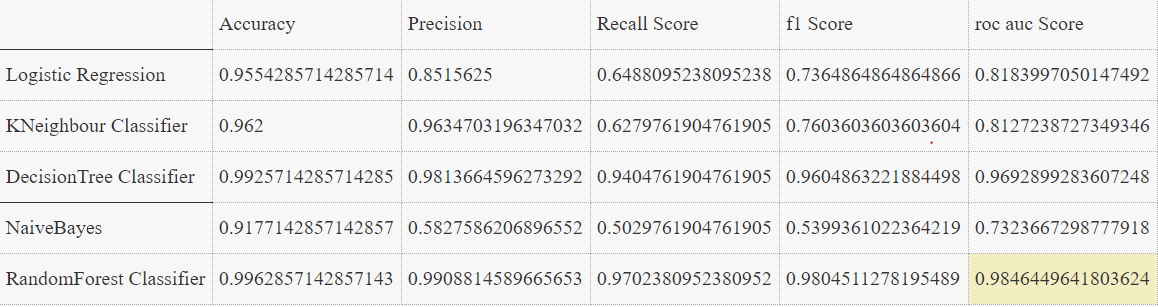

**KNeighbour train Confusion Matrix:**

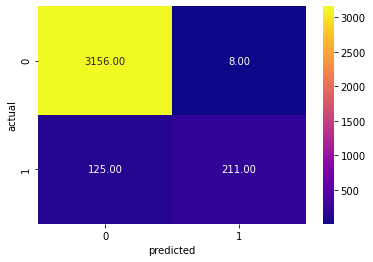

**DecisionTree train Confusion Matrix:**

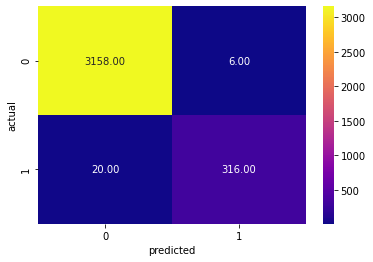

**NaiveBayes train Confusion Matrix:**

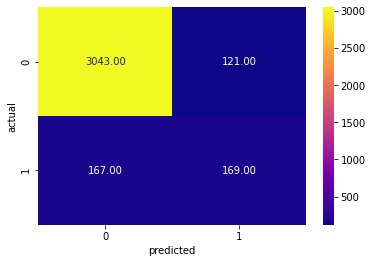

**RandomForest Train Confusion Matrix:**

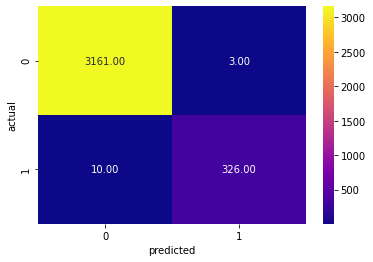

Comparing all the FP and FN values from our various models, we observed that RandomForest had the least values of FP and FN for both testing and training.

As you can see in the comparison table of test and train model, we can say that RandomForest Classifier work very well on our dataset. The metrics related of RandomForest Classifer have reasonable values. Also DecisionTree Classifier works very well on our dataset. But RandomForest gave good results.

**So I conclude that my model very well works with RandomForest Classifier.**
 
 Following are the navigation links to our algorithms in order of best perfomance:
 1. [Random Forest Classifier](#rf)
 2. [Decision Tree Classifier](#dt)
 3. [K Nearest Neighbours](#knn)
 4. [Logistic Regression](#lr)
 5. [Naive Bayes](#nb)




